# Pillow Palooza





# Data Wrangling and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing the Data

In [2]:
# Load "data/airbnb_price.csv" as a DataFrame called prices.

prices = pd.read_csv('data/prices.csv')

# Load "data/airbnb_room_type.xlsx" as a DataFrame called xls, and the first 
# sheet from xls as a DataFrame called room_types.

room_types = pd.read_excel('data/room_types.xlsx')

# Load "data/airbnb_last_review.tsv" as a DataFrame called reviews.

reviews = pd.read_csv('data/reviews.tsv', delimiter='\t')

## Initial Exploration 

In [3]:
prices.head(50)


,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"
5,5295,135 dollars,"Manhattan, Upper West Side"
6,5441,85 dollars,"Manhattan, Hell's Kitchen"
7,5803,89 dollars,"Brooklyn, South Slope"
8,6021,85 dollars,"Manhattan, Upper West Side"
9,6848,140 dollars,"Brooklyn, Williamsburg"


In [4]:
print(prices.shape)
print(prices.info())

(25209, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
None


In [5]:
prices[prices.duplicated()==True]

,listing_id,price,nbhood_full


In [6]:
room_types.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [7]:
print(room_types.shape)
print(room_types.info())

(25209, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
None


In [8]:
room_types[room_types.duplicated()==True]

,listing_id,description,room_type


In [9]:
reviews.head(50)

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019
5,5295,Lena,June 22 2019
6,5441,Kate,June 23 2019
7,5803,Laurie,June 24 2019
8,6021,Claudio,July 05 2019
9,6848,Allen & Irina,June 29 2019


In [10]:
print(reviews.shape)  
print(reviews.info())

(25209, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
None


In [11]:
reviews[reviews.duplicated()==True]

,listing_id,host_name,last_review


## Initial Observations

- Listing ID should be a string
- incorrect date format in reviews['last_review']
- prices['price'] should be an int, remove 'dollars'
- missing values from reviews['host_name']
- reviews['host_name'] incorrect formatting, contains some 'and', 'or', lack of spaces between name and surname.
- missing values from room_type['description']
- prices['price'] remove outliers
- new column prices['price_per_month']
- prices['nbhood_full'] can be abreviated
- room_type['room_type'] should be standard descriptions. 

## Prices dataframe

### Price column
The price column in the prices DataFrame currently records each value as a string with the currency (dollars) following, i.e. 

We'll use regex to remove the 'dollar' and then convert the datatype of the column to a int.

> price <br>
> 225 dollars <br>
> 89 dollars <br>
> 200 dollars <br>

In [12]:
# Cleaning the Price Column:
# using regex to extract all characters which aren't an int '(\d+)'
# converting the datatype of the column from object to float

prices['price'] = prices['price'].str.extract('(\d+)', 
                                              expand=False).astype(float)

prices.head()

,listing_id,price,nbhood_full
0,2595,225.0,"Manhattan, Midtown"
1,3831,89.0,"Brooklyn, Clinton Hill"
2,5099,200.0,"Manhattan, Murray Hill"
3,5178,79.0,"Manhattan, Hell's Kitchen"
4,5238,150.0,"Manhattan, Chinatown"


In [13]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   listing_id   25209 non-null  int64  
 1   price        25209 non-null  float64
 2   nbhood_full  25209 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 591.0+ KB


### Avg Price column

#### Removing outliers
Three quarters of listings cost $175 per night or less. However, there are some outliers including a maximum price of $7,500 per night. Some listings are even showing as free. We'll remove these from the DataFrame and 
calculate the average price, to the nearest 2 decimal places, storing this as avg_price. Then, calculate the average_price_month. 



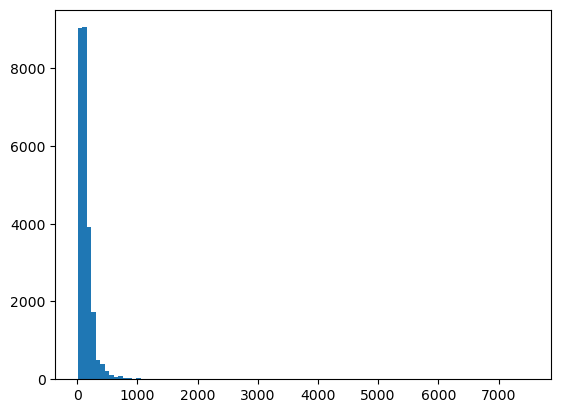

In [14]:
# Exclude values equal to 0
prices = prices[prices['price'] != 0]

plt.hist(prices['price'], 100);


We will not to remove outliers in the upper region. We are examining prices per borough and within specific price categories. Removing prices in the upper region could potentially distort the outcomes, especially when considering expensive rental prices in certain boroughs. By retaining the outliers, we aim to maintain the integrity and accuracy of our analysis for a more comprehensive understanding of the rental market. 

In [15]:
# calculating avg_price
avg_price = prices['price'].mean()

print('$', round(avg_price, 2))

$ 141.82


### Avg Price per Month column

We know how much a listing costs, on average, per night, but it would be useful to have a benchmark for comparison. According to [Zumper](https://www.zumper.com/rent-research), a 1 bedroom apartment in New York City costs, on average, $3,100 per month. 

So we'll convert the per-night prices of our listings into monthly costs, so we can compare to the private market.



In [16]:
# new column: monthly_price
prices['monthly_price'] = prices['price']*30

# calculate avergae monthly price 
avg_monthly_price = prices['monthly_price'].mean()

print('$', round(avg_monthly_price, 2))

$ 4254.52


## Room types dataframe

### Room Type column

The room_type column has several variations for private room listings. 
We'll dive deeper into this column to clean the breakdown of listings by room type. 

In [17]:
# Using regex to and replacing several variations of room type with a standard description. 

room_types['room_type'] = room_types['room_type'].str.lower()

room_types['room_type'].value_counts()

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

## Reviews dataframe

### Last review column
The last_review column contains the date of the last review in the format of "Month Day Year" e.g., May 21 2019. 
We'll change this format to a pandas datetime.


In [18]:
# incorrect date format in reviews['last_review']

reviews['last_review'] = pd.to_datetime(reviews['last_review'])
reviews.head()

,listing_id,host_name,last_review
0,2595,Jennifer,2019-05-21
1,3831,LisaRoxanne,2019-07-05
2,5099,Chris,2019-06-22
3,5178,Shunichi,2019-06-24
4,5238,Ben,2019-06-09


## Host Name Column

Clean this column to standardize name format. 

In [19]:
# format host name

# Add a space between a lowercase letter and an uppercase letter
reviews['host_name'] = reviews['host_name'].str.replace(r'([a-z])([A-Z])', r'\1 \2')

# Capitalize the first and second words
reviews['host_name'] = reviews['host_name'].str.title()

# Replace '&', 'AND', 'and', 'Or', 'OR', 'And', 'or' with '&'
reviews['host_name'] = reviews['host_name'].str.replace(r'(&| AND | and | Or | OR | And | or )', ' & ')

/var/folders/1m/hvnyjbcx2rxfb9d__rb_m7h00000gp/T/ipykernel_6152/1820784833.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['host_name'] = reviews['host_name'].str.replace(r'([a-z])([A-Z])', r'\1 \2')
/var/folders/1m/hvnyjbcx2rxfb9d__rb_m7h00000gp/T/ipykernel_6152/1820784833.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['host_name'] = reviews['host_name'].str.replace(r'(&| AND | and | Or | OR | And | or )', ' & ')


## Joining the dataframes

* Merge the three DataFrames to make any future analysis easier to conduct. 

* Remove any observations with missing values and check for duplicates.

* Convert listing ID to string



In [20]:
df = pd.merge(reviews, prices, on='listing_id')
df = pd.merge(df, room_types, on='listing_id')

df.head()

,listing_id,host_name,last_review,price,nbhood_full,monthly_price,description,room_type
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",6750.0,Skylit Midtown Castle,entire home/apt
1,3831,Lisa Roxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",2670.0,Cozy Entire Floor of Brownstone,entire home/apt
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",6000.0,Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",2370.0,Large Furnished Room Near B'way,private room
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",4500.0,Cute & Cozy Lower East Side 1 bdrm,entire home/apt


In [21]:
df['listing_id'] = df['listing_id'].astype('string')

df['description'] = df['description'].fillna('No description')
df['host_name'] = df['host_name'].fillna('Unknown.')

df.isnull().sum()

listing_id       0
host_name        0
last_review      0
price            0
nbhood_full      0
monthly_price    0
description      0
room_type        0
dtype: int64

## Analyzing listing prices by NYC borough

* Initial analysis to understand the difference in listing prices between the [New York City boroughs](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City).
* Extract the information from nbhood_full  and store in a new column, borough, for analysis.

In [22]:
df['borough'] = df['nbhood_full'].str.split(',').str.get(0)

df.head()

,listing_id,host_name,last_review,price,nbhood_full,monthly_price,description,room_type,borough
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",6750.0,Skylit Midtown Castle,entire home/apt,Manhattan
1,3831,Lisa Roxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",2670.0,Cozy Entire Floor of Brownstone,entire home/apt,Brooklyn
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",6000.0,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Manhattan
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",2370.0,Large Furnished Room Near B'way,private room,Manhattan
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",4500.0,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Manhattan


## Price range by borough

* categorize listings based on whether they fall into specific price ranges, and view this by borough.

* percentiles and labels to create a new column, price_range, in the DataFrame. 



In [23]:

price_ranges = {
    (0, 69): '$0-69',
    (70, 175): '$70-175',
    (176, 350): '$176-350',
    (351, float('inf')): '>$350'
}

def categorize_price(price):
    for price_range, label in price_ranges.items():
        if price >= price_range[0] and price <= price_range[1]:
            return label

df['price_range'] = df['price'].map(categorize_price)
df['labels'] = df['price_range'].replace(price_ranges.values(), ['Budget', 'Average', 'Expensive', 'Extravagant'])



df.head()

,listing_id,host_name,last_review,price,nbhood_full,monthly_price,description,room_type,borough,price_range,labels
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",6750.0,Skylit Midtown Castle,entire home/apt,Manhattan,$176-350,Expensive
1,3831,Lisa Roxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",2670.0,Cozy Entire Floor of Brownstone,entire home/apt,Brooklyn,$70-175,Average
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",6000.0,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Manhattan,$176-350,Expensive
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",2370.0,Large Furnished Room Near B'way,private room,Manhattan,$70-175,Average
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",4500.0,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Manhattan,$70-175,Average



* group the data and count frequencies for listings in each price range by borough.

| label      | price     | 
|------------|-----------|
| budget     | \$0-69    | 
| average    | \$70-175  |
| expensive  | \$176-350 | 
| extravagant| >\$350    |

In [24]:
# Group the data by 'borough' and 'price_range', and count the frequencies
grouped_df = df.groupby(['borough', 'price_range', 'labels']).size().reset_index(name='frequency')

grouped_df.head(50)


,borough,price_range,labels,frequency
0,Bronx,$0-69,Budget,381
1,Bronx,$176-350,Expensive,25
2,Bronx,$70-175,Average,286
3,Bronx,>$350,Extravagant,5
4,Brooklyn,$0-69,Budget,3201
5,Brooklyn,$176-350,Expensive,1466
6,Brooklyn,$70-175,Average,5534
7,Brooklyn,>$350,Extravagant,259
8,Manhattan,$0-69,Budget,1150
9,Manhattan,$176-350,Expensive,3073


## Exporting the clean datasets

In [25]:
avg_price = prices['price'].mean()

print('$', round(avg_price, 2))

$ 141.82


In [26]:
df['price'].max()

7500.0